In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('data/chess-openings.csv')
counts = {k:v for k,v in dict(df['opening'].value_counts()).items()}
mean_count = np.array(list([c for c in counts.values() if c > 1])).mean()

In [20]:
n = 10
wins = dict()

for opening,count in counts.items():
    games = df[df['opening'] == opening]
    
    white = len(games[games['white_result'] == 'win']) / count
    black = len(games[games['black_result'] == 'win']) / count
    
    if count > mean_count:
        wins[opening] = white if white > black else -black

wins = dict(sorted(wins.items(), key=lambda item: item[1], reverse=True))

<BarContainer object of 10 artists>

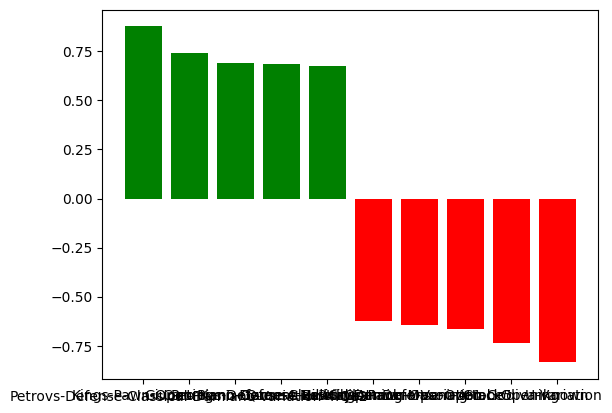

In [25]:
n = 5
os = list(wins.keys())
ps = list(wins.values())
colors = ['g' if (x > 0) else 'r' for x in (ps[:n]+ps[-n:])]
plt.bar((os[:n] + os[-n:]), (ps[:n] + ps[-n:]), color=colors)